In [1]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if len(gpus) > 0 : print('Available GPUs: {}'.format(gpus))
else             : print('!!! No GPUs found !!!')

!!! No GPUs found !!!


In [2]:
# https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

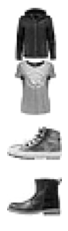

In [7]:
plt.imshow(X_train[:4].reshape(28 * 4, -1), cmap="binary")
plt.axis('off')
plt.show()

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Saving figure fashion_mnist_plot


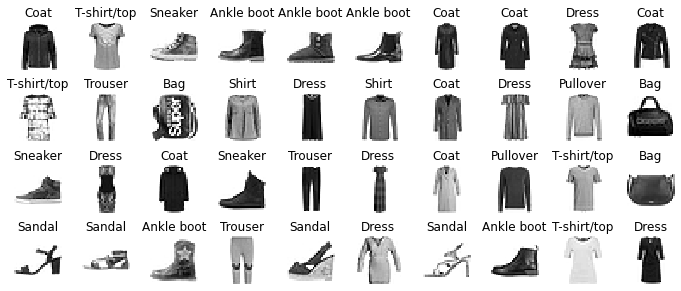

In [9]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.layers

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4842 - accuracy: 0.8317 - val_loss: 0.4353 - val_accuracy: 0.8536
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4392 - accuracy: 0.8458 - val_loss: 0.5306 - val_accuracy: 0.7998
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4124 - accuracy: 0.8563 - val_loss: 0.3913 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3938 - accuracy: 0.8624 - val_loss: 0.3743 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3751 - accuracy: 0.8675 - val_loss: 0.3706 - val_accuracy: 0.8736
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3630 - accuracy: 0.8712 - val_loss: 0.3626 - val_accuracy:

Saving figure keras_learning_curves_plot


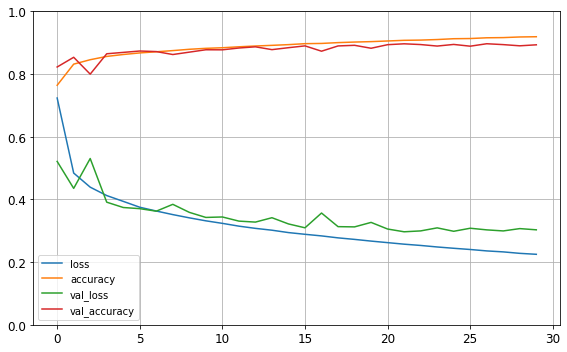

In [15]:
import pandas as pd

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 948us/step - loss: 0.3368 - accuracy: 0.8819


[0.33675992488861084, 0.8819000124931335]